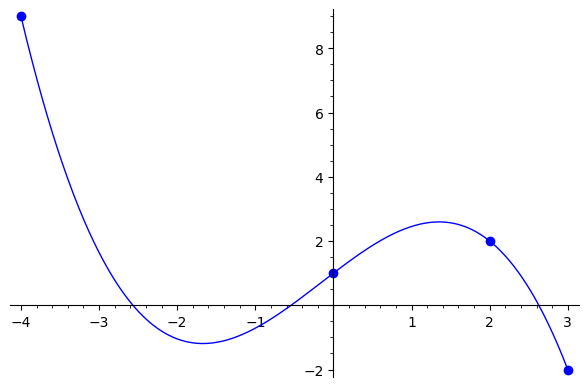

In [1]:
# Interpolacion Global

nodes = [(-4,9), (0,1),(2,2),(3,-2)] # nodos de interpolacion
R = PolynomialRing(RDF, 'x')        # polinomios sobre RDF
f = R.lagrange_polynomial(nodes)    # pol. de interpolacion
# -0.2738095238095238*x^3 - 0.13095238095238104*x^2 + 1.8571428571428572*x + 1.0
P = plot(f,-4,3)
Q = line(nodes, marker='o', linestyle="") 
P+Q

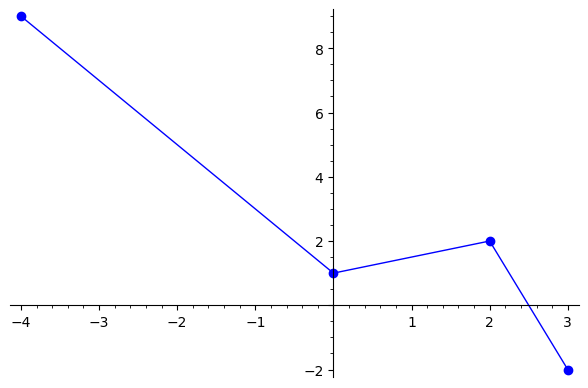

In [9]:
# Interpolaccion a cachos
line(nodes, marker='o')

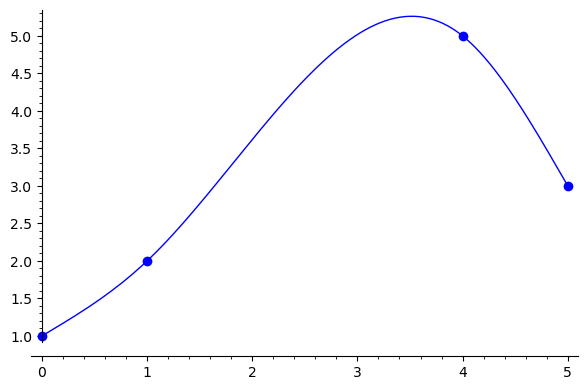

In [10]:
# Interpolacion a cachos por splines cubicos
nodes = [(0, 1), (1, 2), (4, 5), (5, 3)]
s = spline(nodes)
plot(s,0,5) + line(nodes, marker="o", linestyle="")

# Limitacion do Erro na Interpolacion

Creada a funcion de interpolacion.
Interpolamos comezando cun numero de subintervalos (n) pequeno e vamolo aumentando
Se observamos qeu a medida que interpola ben no centro o erro nos extremos acrecentase
Esa funcion presenta o fenomeno de Rouge

In [2]:
# f = funcion
# a, b = intervalo
# n = número de subintervalos
def interpola(f, a, b, n):
    # abscisas
    t = [a,a+(b-a)/n..b] #n subintervalos, n+1 nodos
    # ordenadas = map(f,t)
    
    # zip crea unha tupla de t(abscisas) e as ordenadas (map(f,t))
    nodes = list(zip(t,map(f,t)))
    
    # R digamos que se establece como un elemento de tipo polinómico (como se fose un int)
    R = PolynomialRing(RDF, 'x')
    # p convertese nun polinomio de lagrange cos datos dos nodos
    p = R.lagrange_polynomial(nodes)
    g1 = plot(f, min(t), max(t), color='blue', legend_label='funcion')
    g2 = plot(p, min(t), max(t), color='green', legend_label='polinomio')
    show(g1+g2)

Se temos o intervalo a, b. A distancia dese intervalo é b-a.
Se temos n nodos nese intervalo.
cada nodo ten o tamaño de b-a/n
De ahí que o segundo punto do intervalo a,b (considerando a como o primeiro) é:
a + (b-a)/n

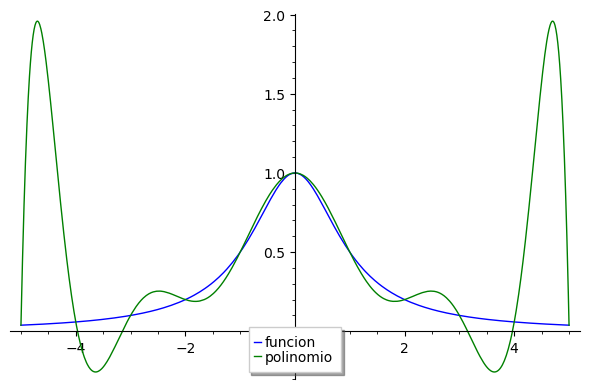

In [3]:
# f(x) = 1/(1+x^2)
# interpola(f, -5, 5, 10)
interpola(lambda x: 1/(1+x^2), -5, 5, 10)

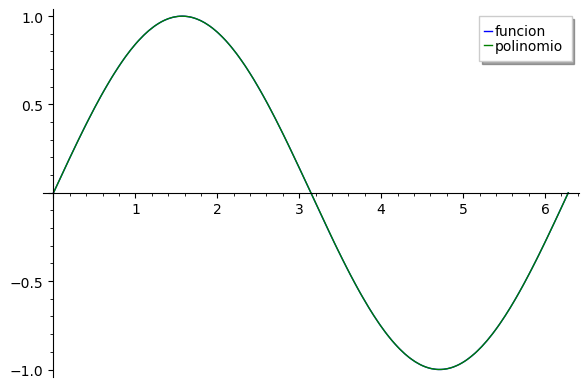

In [37]:
interpola(lambda x: sin(x), 0, 2*pi, 10) # Non presenta fenomeno de Rouge

In [38]:
def polinomio_interpolacion(f, a, b, n):
    t = [a,a+(b-a)/n..b] #n subintervalos, n+1 nodos
    nodes = list(zip(t,map(f,t)))
    R = PolynomialRing(RDF, 'x')
    return R.lagrange_polynomial(nodes)

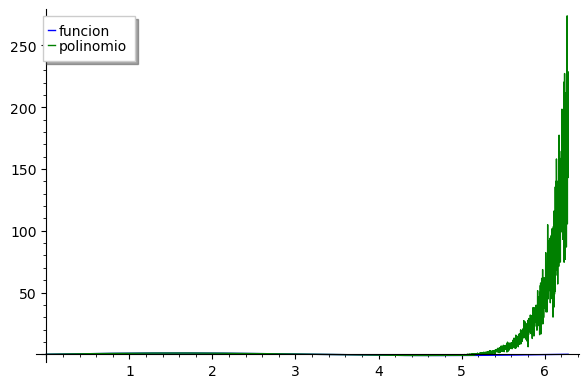

O valor de epsilon (erro de máquina) é: 2.220446049250313e-16


1.4502879542078113e-20*x^40 - 1.8193657671015833e-18*x^39 + 1.1024027632990803e-16*x^38 - 4.297896834556181e-15*x^37 + 1.2117159933177404e-13*x^36 - 2.6324619935904996e-12*x^35 + 4.5856668058733507e-11*x^34 - 6.580572107063917e-10*x^33 + 7.931923001248482e-09*x^32 - 8.147655865733413e-08*x^31 + 7.211616618195472e-07*x^30 - 5.547741739084205e-06*x^29 + 3.734379715426546e-05*x^28 - 0.00022113117394174865*x^27 + 0.0011566993289685056*x^26 - 0.005361990682107205*x^25 + 0.02208061389399456*x^24 - 0.08091198443203863*x^23 + 0.2641142327843874*x^22 - 0.7683384847050525*x^21 + 1.991845191873387*x^20 - 4.598553667728035*x^19 + 9.443377322869274*x^18 - 17.218636532834704*x^17 + 27.809277992642983*x^16 - 39.66035595151097*x^15 + 49.75304492797806*x^14 - 54.639912910307935*x^13 + 52.227241139932104*x^12 - 43.1408694025547*x^11 + 30.52758112996808*x^10 - 18.306882848661292*x^9 + 9.178445638422028*x^8 - 3.781402300286661*x^7 + 1.2511557217201423*x^6 - 0.31401966872628617*x^5 + 0.06184306935697307*x^

In [45]:
# cando se incrementa moito n e non presente fenomeno de rouge
# esto xa non é o polinomio de interpolacion
# hai errores numéricos que fan que a frabicación do polinomio sexa errónea
# observase que os valor de polinomio son moito inferiores a epsilon

interpola(lambda x: sin(x), 0, 2*pi, 40)
print(f"O valor de epsilon (erro de máquina) é: {RDF.epsilon()}")
polinomio_interpolacion(lambda x: sin(x), 0, 2*pi, 40)